## Métodos de Aprendizagem de Máquina em Química
 
Prof. Luciano T. Costa \
e-mail: ltcosta@id.uff.br \
Departamento de Físico-Química \
Sala 309 \
Prof. Eduardo Krampser \
e-mail: eduardo.krempser@fiocruz.br \
MolMod-CS: www.molmodcs.uff.br \
Facebook: https://www.facebook.com/molmodcs \
Linkedin: https://www.linkedin.com/in/luciano-t-costa-90a85a164/ 

In [156]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import numpy as np

**Árvores de Decisão**

Uma Árvore de Decisão pode ser descrita de forma simplificada como uma sequência de condições SE-ENTÃO-SENÃO,
o que permite que o conhecimento adquirido seja interpretado de maneira transparente como em um fluxograma.
Portanto, em uma árvore de decisão, cada atributo do conjunto de dados pode ser selecionado para a aplicação de um teste, chegando-se a uma decisão final após uma sequência de testes nos diferentes atributos selecionados. 
Cada teste é um nó na árvore, sendo o primeiro chamado de raiz. Os testes são ramificados até atingir o nó terminal, também chamado de folha. 

A forma e a ordem que os atributos são selecionados, assim como os testes são definidos, determinam a construção final da árvore. Sendo assim, existem diversos métodos para a geração de árvores de decisão, tais como CART, ID, C4.5, entre muitos outros.

[link](https://scikit-learn.org/0.16/modules/tree.html#classification)

In [157]:
datafile = "data/iris.csv"
df = pd.read_csv(datafile, header = 0)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [158]:
feature_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x = df[feature_cols]
y = df.species

In [159]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) 

In [160]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [161]:
print("Accuracy:",accuracy_score(y_test, y_pred))


Accuracy: 0.9555555555555556


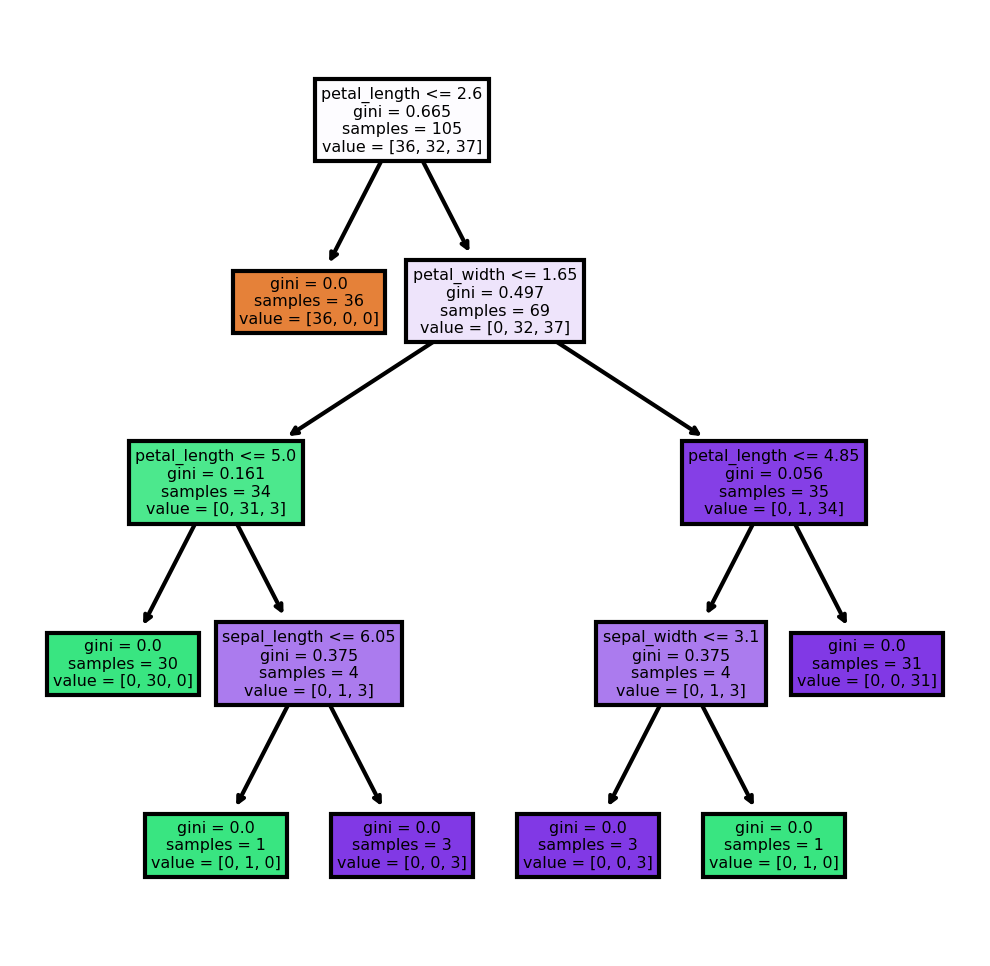

In [162]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(classifier, filled=True, feature_names=list(x_test.columns))
plt.show()

**Seleção de modelos e Busca de Hiperparâmetros**

A aplicação de um método de Aprendizado de Máquina demanda da seleção do modelo treinado, identificando o modelo mais adequado a cada cenário. Porém, deve-se lembrar que o treinamento de um modelo de Aprendizado de Máquina passa essencialmente pela definição de seus hiperparâmetros (parâmetros intrínsecos do modelo), com cada novo hiperparâmetro gerando um novo modelo preditivo.

Um dos mecanismos para a obtenção dos melhores hiperparâmetros na construção dos modelos é a realização de uma busca exaustiva (busca em grade) sobre os possíveis valores avaliados para cada hiperparâmetro considerado. Avaliando o desempenho dos modelos gerados sobre uma parte do conjunto de dados (que não façam parte do conjunto final de testes). Usualmente essa avaliação é baseada em um método de Validação Cruzada.

In [194]:
param_grid = {'criterion': ("gini", "entropy"), 
              'max_depth': (3, 4, 5, 10, 20, None)}

In [195]:
classifier_grid = GridSearchCV(classifier, param_grid, cv=5)

In [196]:
classifier_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': (3, 4, 5, 10, 20, None)})

In [166]:
classifier_grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [167]:
classifier_grid.best_score_

0.9523809523809523

In [168]:
classifier = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
classifier = classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


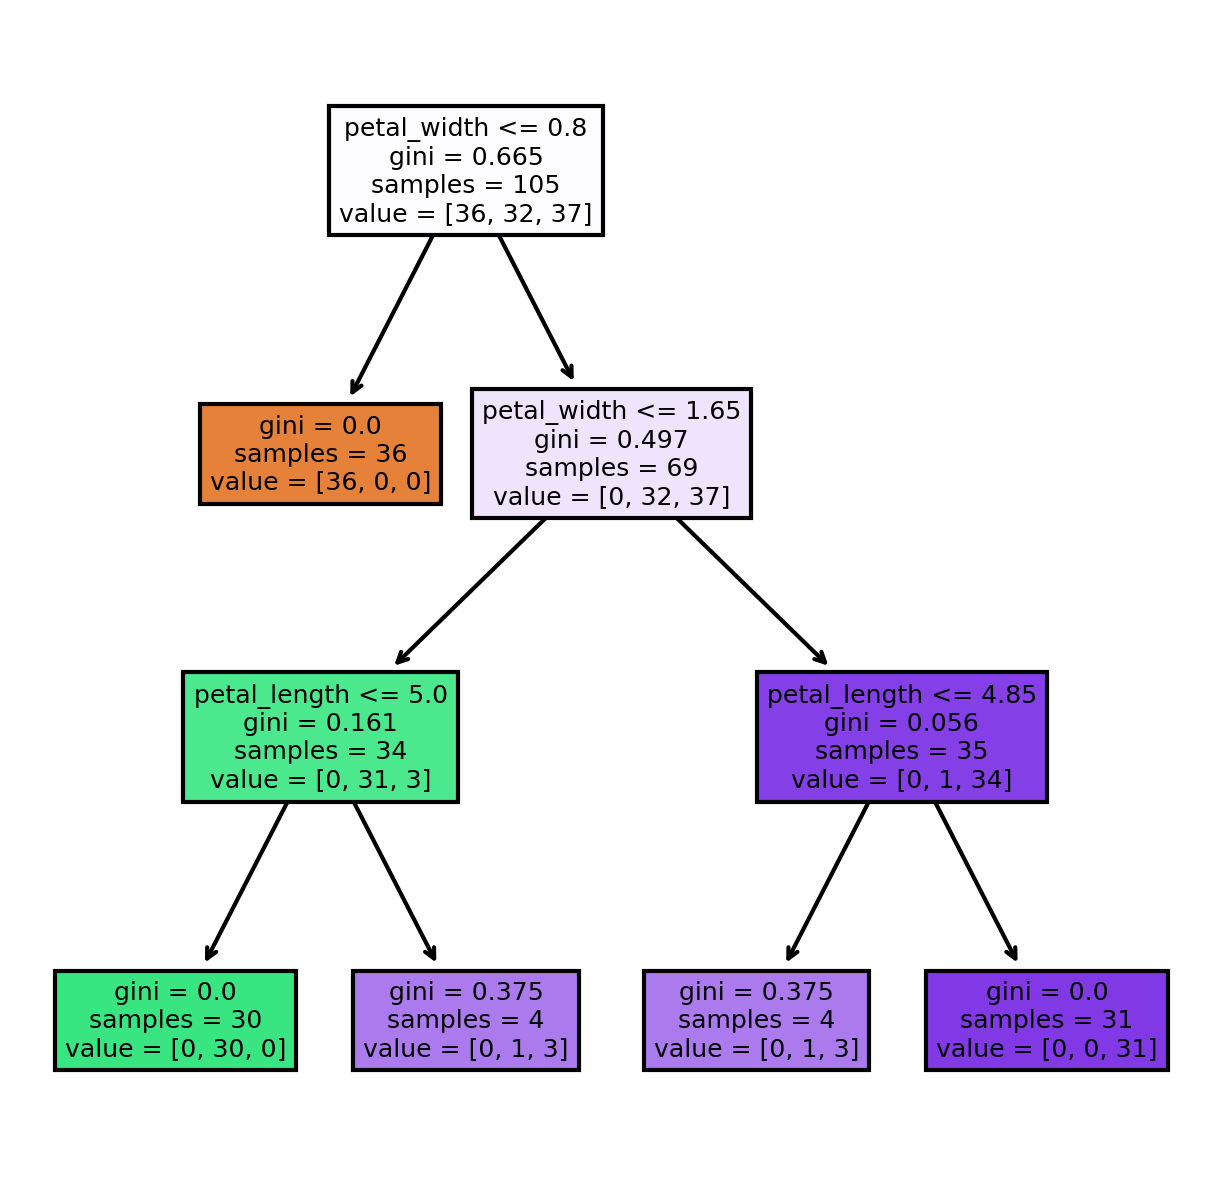

In [169]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(classifier, filled=True, feature_names=list(x_test.columns))
plt.show()

**Avaliação de modelos**

Etapa crucial da aplicação de métodos de Aprendizado de Máquina é a avaliação dos modelos gerados, no qual o máximo de diferentes medidas devem ser considerados e integradamente analisados.

In [197]:
print(confusion_matrix(y_test, y_pred))  

[[ 7  1]
 [ 0 14]]


In [198]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.93      1.00      0.97        14

    accuracy                           0.95        22
   macro avg       0.97      0.94      0.95        22
weighted avg       0.96      0.95      0.95        22



https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support

In [199]:
matthews_corrcoef(y_test, y_pred)

0.903696114115064

In [200]:
df.corr() #Pearson

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [201]:
df.corr(method="spearman") #Spearman

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.159457,0.881386,0.834421
sepal_width,-0.159457,1.000000,-0.303421,-0.277511
petal_length,0.881386,-0.303421,1.000000,0.936003
petal_width,0.834421,-0.277511,0.936003,1.000000


Apenas para exemplificação, o problema de predição dos pontos de ebulição foi convertido para um problema de classificação em que o objetivo é identificar se o álcool possui um ponto de ebulição menor ou não que 425.

In [202]:
ROH = pd.read_csv('data/ROH_data.csv', sep=',')
ROH.head()

,bp,MW,carbons,degree,aliphatic,avg_aryl_position,cyclic
0,338,32.04,1,1,1,0.0,0
1,351,46.07,2,1,1,0.0,0
2,371,60.10,3,1,1,0.0,0
3,356,60.10,3,2,1,0.0,0
4,391,74.12,4,1,1,0.0,0


<AxesSubplot:>

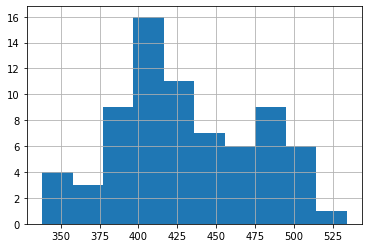

In [203]:
ROH['bp'].hist()

In [204]:
ROH['bp'].median()

425.5

Para a nossa classificação, uma nova variável de resposta (target) será obtido a partir dos pontos de ebulição já conhecidos.

In [205]:
ROH['class'] = 0
ROH['class'] = ROH['bp'].apply(lambda x: 1 if x >= 425.5 else 0)

<AxesSubplot:>

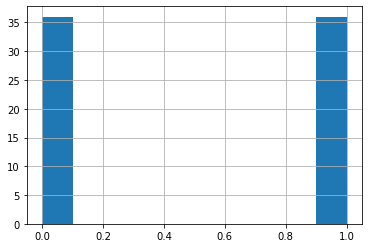

In [206]:
ROH['class'].hist()

In [207]:
feature_cols = ['MW', 'carbons', 'degree', 'aliphatic', 'avg_aryl_position', 'cyclic']
x = ROH[feature_cols]
y = ROH['class']

In [208]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) 

In [209]:
classifier = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
classifier = classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9545454545454546


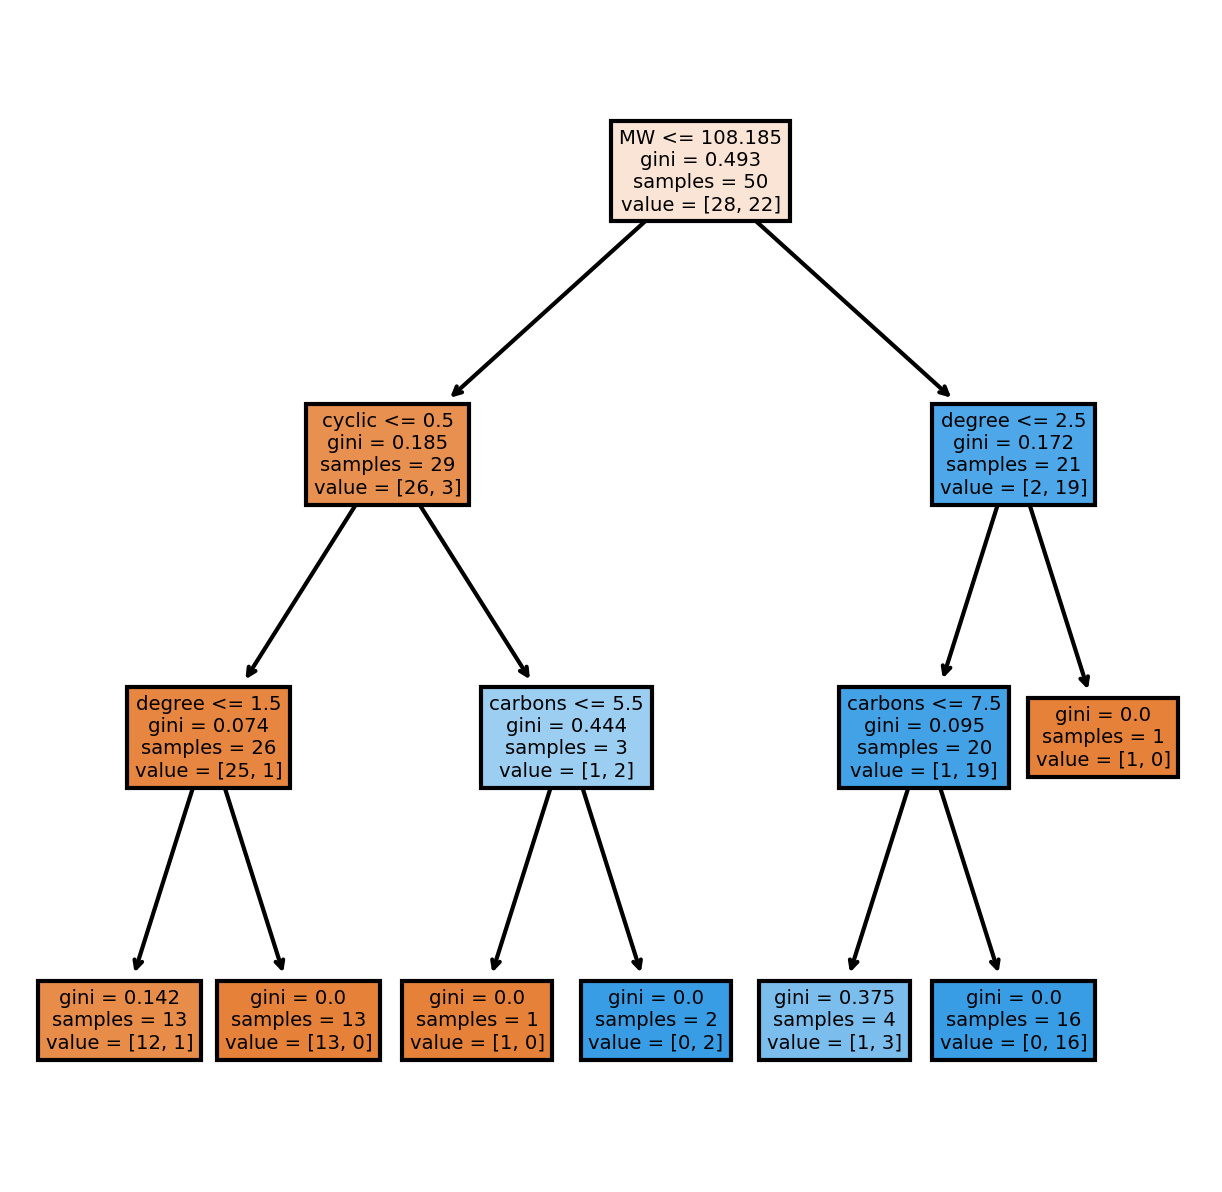

In [210]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(classifier, filled=True, feature_names=list(x_test.columns))
plt.show()

**Padronização e normalização de dados**

Apesar de não afetar diretamente a construção de árvores de decisão, a padronização dos dados é importante para a aplicação de métodos gerais de Aprendizado de Máquina, considerando que a comparação ou manipulação de atributos de diferentes grandezas pode afetar os resultados tanto numericamente quanto no impacto entre atributos.

In [211]:
names = ROH.columns
data = ROH.values[:, :-1]
transf = MinMaxScaler()
data = transf.fit_transform(data)

In [212]:
x = pd.DataFrame(data)

In [213]:
x.columns = names[:-1]

In [214]:
x.drop(['bp'], axis = 1, inplace=True)

In [215]:
y = ROH['class']

In [216]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) 

In [217]:
classifier = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
classifier = classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9545454545454546
